<img src="../images/ibm-logo.png" alt="ibm-logo" align="center" style="width: 200px;"/>

**AI ENTERPRISE WORKFLOW CERTIFICATION**

<hr />

### Case Study - Data visualization Solution


### Objectives

Recall that you are trying to identify the factors that contribute to the unique market situation in Singapore. Singapore has a higher rate of churn than the other markets and there is something in the data that, once uncovered, will allow you to make a hypothesis.

Your deliverable is a storyboard. The story should begin with descriptions of the data along with a summary of the business opportunity. The rest of the story details the process of your investigation and puts into context your findings. Finally, you should end with some discussion and suggestions about next steps in the process.

### Running Notebook in Watson Studio on the IBM Cloud

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
# START CODE BLOCK
# cos2file - takes an object from Cloud Object Storage and writes it to file on container file system.
# Uses the IBM project_lib library.
# See https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/project-lib-python.html
# Arguments:
# p: project object defined in project token
# data_path: the directory to write the file
# filename: name of the file in COS

import os
def cos2file(p,data_path,filename):
    data_dir = p.project_context.home + data_path
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    open( data_dir + '/' + filename, 'wb').write(p.get_file(filename).read())

# file2cos - takes file on container file system and writes it to an object in Cloud Object Storage.
# Uses the IBM project_lib library.
# See https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/project-lib-python.html
# Arguments:
# p: prooject object defined in project token
# data_path: the directory to read the file from
# filename: name of the file on container file system

import os
def file2cos(p,data_path,filename):
    data_dir = p.project_context.home + data_path
    path_to_file = data_dir + '/' + filename
    if os.path.exists(path_to_file):
        file_object = open(path_to_file, 'rb')
        p.save_data(filename, file_object, set_project_asset=True, overwrite=True)
    else:
        print("file2cos error: File not found")
# END CODE BLOCK

### Project Setup

Create directories to store the project materials

In [3]:
cos2file(project, '/data', 'aavail-customers.db')
cos2file(project, '/data', 'aavail-streams.csv')
cos2file(project, '/scripts', 'aavail-data-ingestor.py')
cos2file(project, '/images', 'ibm-logo.png')

 ### Data Ingestion

* Let's consider a data ingestion script that readily accepts more data in batch form
* We will be using the AAVAIL datasets as a basis for this case study.
* Let's start by gathering data from the sources provided.

We will be working on necessary data given below:

* [m2-u4-case-study.ipynb](m1-u6-case-study.ipynb)
* [aavail-customers.db](./data/aavail-customers.db)
* [aavail-steams.csv](./data/aavail-streams.csv)

#### Exploratory Data Analysis

Sometimes it is known in advance which types of data integrity issues to expect, but other times it is during the Exploratory Data Analysis (EDA) process that these issues are identified. 

After extracting data it is important to include checks for quality assurance even on the first pass through the AI workflow.  Let's combine the data into a single structure and provide a couple checks for quality assurance.

**Implementation of checks for Quality Assurance**

- Remove any repeat customers based on customer_id
- Remove stream data that do not have an associated stream_id
- Check for missing values

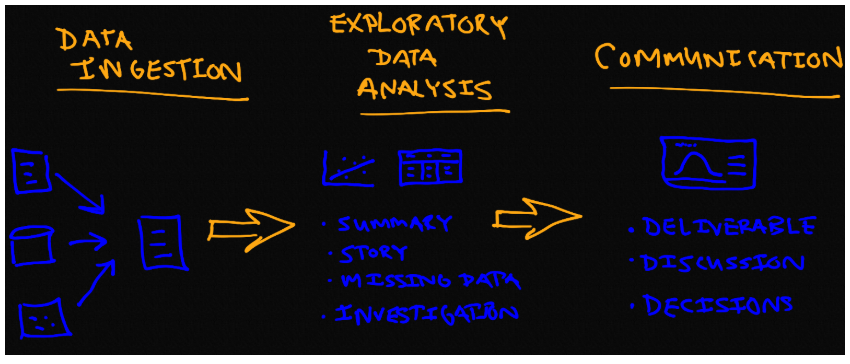

**Combine the data into a single data structure**

The two most convenient structures for this task are Pandas dataframes and NumPy arrays. At a minimum ensure that your structure accommodates the following.

- A column for customer_id
- A column for country
- A column for age that is created from DOB
- A column customer_name that is created from first_name and last_name
- A column to indicate churn called is_subscriber
- A column that indicates subscriber_type that comes from invoice_item
- A column to indicate the total num_streams

In [4]:
!rm ../data/aavail-target.csv
!python ../scripts/aavail-data-ingestor.py -d aavail-customers.db -s aavail-streams.csv
!wc -l ../data/aavail-target.csv
file2cos(project, "/data", "aavail-target.csv")

...successfully connected to db

...imported db dataset of 1007 rows and 8 columns
...removed 7 number of duplicates customer ids
...imported streams dataset of 18859 rows and 5 columns
...removed 1164 missing stream ids
done
1001 ../data/aavail-target.csv


In [5]:
import os
import pandas as pd
import numpy as np

## specify the data directory
DATA_DIR = os.path.join("..","data")

# load the dataset
DATA_PATH = os.path.join(DATA_DIR, "aavail-target.csv")
df_clean = pd.read_csv(DATA_PATH)
df_clean.head(10)

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,22,Kasen Todd,1,aavail_premium,23
1,2,singapore,31,Ensley Garza,0,aavail_unlimited,12
2,3,united_states,23,Lillian Carey,0,aavail_premium,22
3,4,united_states,21,Beau Christensen,1,aavail_basic,19
4,5,singapore,22,Ernesto Gibson,1,aavail_premium,23
5,6,united_states,23,Deshawn Murray,1,aavail_premium,20
6,7,singapore,50,Daxton Tate,0,aavail_basic,18
7,8,united_states,48,Tenley Small,1,aavail_premium,20
8,9,united_states,22,Kyra Chase,0,aavail_premium,24
9,10,united_states,27,London Barber,1,aavail_basic,20


Top ten rows of the cleaned dataset

### Investigative Visualization

Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed. The tables we just created above is difficult to navigate it can be useful to use a simple plot to summarize the data. It is possible that both a table and a plot might be needed to communicate the findings and one common practice is to include an appendix in the deliverable. 

Another related practice when it comes to EDA is that the communication of your findings, usually via deliverable, is done in a clean and polished way. If using a notebook as a communication tool take the time to remove unnecessary code blocks and other elements as they can distract from the principal takeaways.

The goal here is to see what factors are influencing the Singapore situation and let's start by analyzing these factors.

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
customer_id        1000 non-null int64
country_name       1000 non-null object
age                1000 non-null int64
customer_name      1000 non-null object
is_subscriber      1000 non-null int64
subscriber_type    1000 non-null object
num_streams        1000 non-null int64
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [7]:
df_clean.describe()

,customer_id,age,is_subscriber,num_streams
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,500.500000,28.034000,0.74400,17.69500
std,288.819436,9.114599,0.43664,4.79802
min,1.000000,14.000000,0.00000,1.00000
25%,250.750000,22.000000,0.00000,15.00000
50%,500.500000,24.000000,1.00000,19.00000
75%,750.250000,34.000000,1.00000,21.00000
max,1000.000000,57.000000,1.00000,29.00000


In [8]:
#import Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from IPython.display import Image
%matplotlib inline

**Analyze customer churn per market**

Let's create summary tables to get a better insight into the AAVAIL data. This will helpt ti understand the market size in US and Singapore and identify similarities/differences between the two markets. Remember the business objective is to identify the main factors in the market in Singapore.

In [9]:
df_clean.groupby(["is_subscriber", "country_name"]).size().unstack()

country_name,singapore,united_states
is_subscriber,,
0,161,95
1,139,605


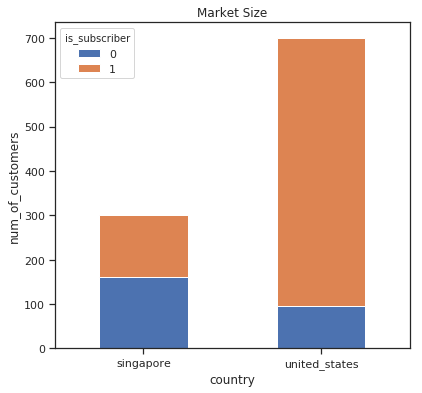

In [10]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)

table_c = pd.pivot_table(df_clean, index = ['country_name'], columns=["is_subscriber"], values = 'customer_id', aggfunc="count")
table_c.plot(kind='bar', stacked=True, ax=ax1, rot=0)
ax1.set_xlabel("country")
ax1.set_ylabel("num_of_customers")
ax1.title.set_text("Market Size")

* The market size in Singapore is smaller than the US market (300 customers in Singapore, 700 in US)
* 54% of the customers in Singapore are non subscribers. In US this number corresponds to almost 14%)

**Analyze customer churn per market and subscription type**

We have an understanding of the market size in US and Singapore. We need to further investigate the data and get a deeper insight. I will analyze now the customers churn by market and subscription type.

In [11]:
df_clean.groupby(["is_subscriber", "country_name", "subscriber_type"]).size().unstack()

subscriber_type              aavail_basic  aavail_premium  aavail_unlimited
is_subscriber country_name                                                 
0             singapore                47              52                62
              united_states            30              37                28
1             singapore                73              32                34
              united_states           217             210               178

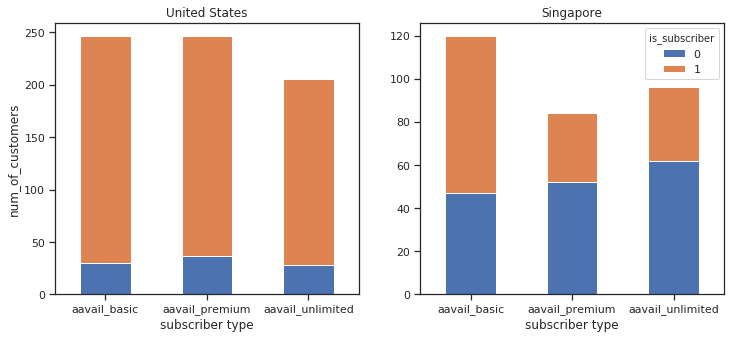

In [12]:
fig = plt.figure(figsize=(12,5))

ax1 = plt.subplot(121)
table_1 = pd.pivot_table(df_clean[df_clean.country_name=="united_states"], index = ['subscriber_type'], columns=["is_subscriber"], values = 'customer_id', aggfunc="count")
table_1.plot(kind='bar', stacked=True, ax=ax1, legend=False, rot=0)
ax1.set_xlabel("subscriber type")
ax1.set_ylabel("num_of_customers")
ax1.title.set_text("United States")

ax2=plt.subplot(122)
table_2 = pd.pivot_table(df_clean[df_clean.country_name=="singapore"], index = ['subscriber_type'], columns=["is_subscriber"], values = 'customer_id', aggfunc="count")
table_2.plot(kind='bar', stacked=True, ax=ax2, rot=0)
ax2.set_xlabel("subscriber type")
ax2.title.set_text("Singapore")

In [13]:
df_clean[df_clean.country_name=="singapore"].groupby(["is_subscriber", "subscriber_type"]).size().unstack()

subscriber_type,aavail_basic,aavail_premium,aavail_unlimited
is_subscriber,,,
0,47,52,62
1,73,32,34


* For all products in US, the subscribers prevail the non-subscribers
* In Singapore, the non-subscribers are more for *unlimited* and *premium* products
* The highest number of non-subscribers in Singapore is of type *aavail-unlimited*, whereas the lowest is *aavail-basic*
* Subscribers in Singapore prefer the basic product to the unlimited and premium products (73 subscriptions for the basic, 66 subscriptions for the other two products together)

**Analyze customer churn in Singapore**

We have identified differences between the US and the Singapore market. We need now to focus more on the market in Singapore and get deeper insights. Let's further investigate the data and analyzed the numerical features in the dataset, **age** and **number of streams**

In [14]:
# Focus only on the singapore customers
df_singapore = df_clean[df_clean.country_name=="singapore"].copy()
num_features = ["age", "num_streams"]

In [15]:
# use groupby
df_singapore.groupby(["is_subscriber", "subscriber_type"])[num_features].describe()

age                                         \
                               count       mean       std   min   25%   50%   
is_subscriber subscriber_type                                                 
0             aavail_basic      47.0  28.382979  9.279602  15.0  23.0  25.0   
              aavail_premium    52.0  26.980769  9.419401  16.0  20.0  23.0   
              aavail_unlimited  62.0  28.177419  9.418371  18.0  22.0  24.0   
1             aavail_basic      73.0  27.410959  9.201201  17.0  21.0  23.0   
              aavail_premium    32.0  28.187500  8.847954  19.0  21.0  24.0   
              aavail_unlimited  34.0  26.529412  8.407195  15.0  21.0  24.0   

                                            num_streams                       \
                                  75%   max       count       mean       std   
is_subscriber subscriber_type                                                  
0             aavail_basic      33.50  56.0        47.0  16.851064  3.978085   
              aavail_premium    34.25  55.0        52.0  14.634615  5.383449   
              aavail_unlimited  30.75  56.0        62.0  15.677419  5.293901   
1             aavail_basic      29.00  55.0        73.0  15.493151  4.589006   
              aavail_premium    35.75  46.0        32.0  14.250000  4.778986   
              aavail_unlimited  28.00  47.0        34.0  11.735294  5.159920   

                                                              
                                min    25%   50%   75%   max  
is_subscriber subscriber_type                                 
0             aavail_basic      7.0  15.50  18.0  19.0  23.0  
              aavail_premium    3.0  11.75  14.0  18.0  26.0  
              aavail_unlimited  4.0  12.00  15.5  18.0  29.0  
1             aavail_basic      2.0  13.00  17.0  19.0  22.0  
              aavail_premium    4.0  11.50  14.0  17.0  24.0  
              aavail_unlimited  1.0   8.50  11.5  15.0  22.0

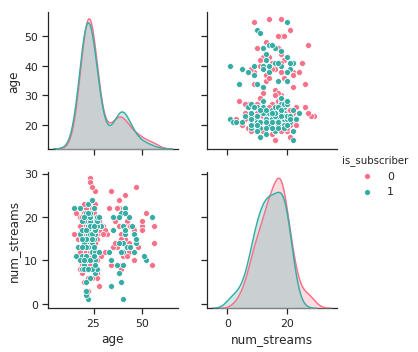

In [16]:
ax1 = sns.pairplot(df_singapore, vars=num_features, hue="is_subscriber", palette="husl")

* The customers age distributions are almost identical for subscribers and non-subscribers
* The num_streams distribution has a bell-shape, the age distribution is skewed to the younger customers (shifted to the left)
* The two classes (0/1) are not linearly separable on the age-num_streams two dimensional space

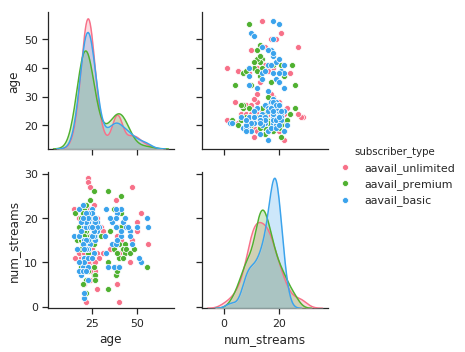

In [17]:
ax2 = sns.pairplot(df_singapore, vars=num_features, hue="subscriber_type", palette="husl")

* The customers age distributions are almost identical for all subscriber types, where *unlimited* is narrower.
* The num_streams distribution for the basic product is slightly shifted to the right

**Analyze customer churn per age group in Singapore**

Let's create a tabular summary and plot the results

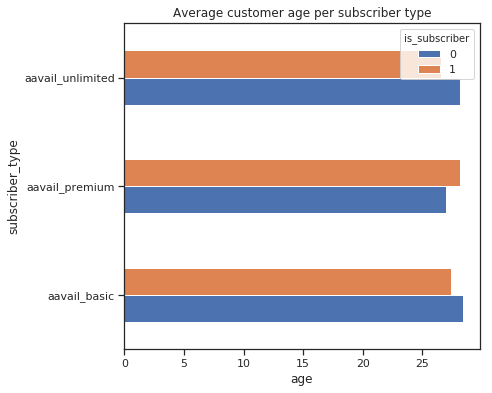

In [18]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
table = df_singapore.groupby(["is_subscriber", "subscriber_type"])["age"].describe()["mean"].unstack(0)
table.plot(kind='barh', ax=ax1)
ax1.set_xlabel("age")
ax1.title.set_text("Average customer age per subscriber type")

In [19]:
age_rank_labels = ["young", "senior", "old"]
df_singapore["age_rank_bins"] = pd.cut(df_singapore.age, 3, precision=0)#, labels=age_rank_labels)
df_singapore.groupby(["is_subscriber", "subscriber_type","age_rank_bins"]).size().unstack()

age_rank_bins                   (15.0, 29.0]  (29.0, 42.0]  (42.0, 56.0]
is_subscriber subscriber_type                                           
0             aavail_basic                33             9             5
              aavail_premium              37            11             4
              aavail_unlimited            44            11             7
1             aavail_basic                54            12             7
              aavail_premium              21             9             2
              aavail_unlimited            26             7             1

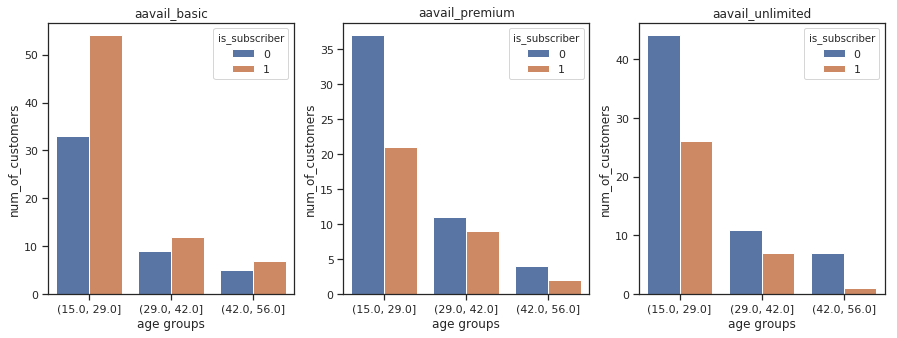

In [20]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(131)

sns.countplot(x="age_rank_bins", data=df_singapore[df_singapore.subscriber_type=="aavail_basic"], hue="is_subscriber", ax=ax1)
ax1.set_xlabel("age groups")
ax1.set_ylabel("num_of_customers")
ax1.title.set_text("aavail_basic")

ax2=plt.subplot(132)
sns.countplot(x="age_rank_bins", data=df_singapore[df_singapore.subscriber_type=="aavail_premium"], hue="is_subscriber", ax=ax2)
ax2.set_xlabel("age groups")
ax2.set_ylabel("num_of_customers")
ax2.title.set_text("aavail_premium")

ax3=plt.subplot(133)
sns.countplot(x="age_rank_bins", data=df_singapore[df_singapore.subscriber_type=="aavail_unlimited"], hue="is_subscriber", ax=ax3)
ax3.set_xlabel("age groups")
ax3.set_ylabel("num_of_customers")
ax3.title.set_text("aavail_unlimited")

* AAVAIL products are mostly popular to young customers (15-29 years old)
* The basic product is the most popular. In each age group the number of subscribers exceeds the number of non-subscriber.
* The highest churn rates are observed in the youngest customer group (i.e., age group 15-29) for all products
* Premium and unlimited are suffering of high churn rates in the youngest customer segment

**Analyze customer churn per streams number in Singapore**

Let's create a tabular summary and plot the results

In [21]:
streams_rank_labels = ["few", "avg", "many"]
df_singapore["streams_rank_bins"] = pd.cut(df_singapore.num_streams, 3, precision=0)#, labels=streams_rank_labels)
df_singapore.groupby(["is_subscriber", "subscriber_type", "streams_rank_bins"]).size().unstack()

streams_rank_bins               (1.0, 10.0]  (10.0, 20.0]  (20.0, 29.0]
is_subscriber subscriber_type                                          
0             aavail_basic                5            32            10
              aavail_premium             11            31            10
              aavail_unlimited           12            37            13
1             aavail_basic               12            45            16
              aavail_premium              8            19             5
              aavail_unlimited           13            18             3

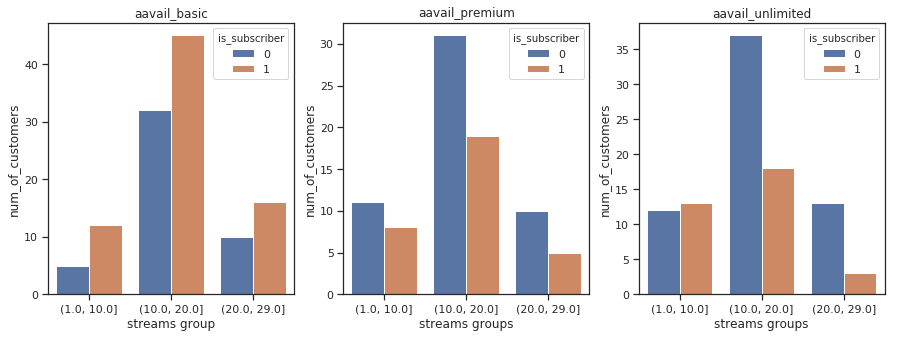

In [22]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(131)

sns.countplot(x="streams_rank_bins", data=df_singapore[df_singapore.subscriber_type=="aavail_basic"], hue="is_subscriber", ax=ax1)
ax1.set_xlabel("streams group")
ax1.set_ylabel("num_of_customers")
ax1.title.set_text("aavail_basic")

ax2=plt.subplot(132)
sns.countplot(x="streams_rank_bins", data=df_singapore[df_singapore.subscriber_type=="aavail_premium"], hue="is_subscriber", ax=ax2)
ax2.set_xlabel("streams groups")
ax2.set_ylabel("num_of_customers")
ax2.title.set_text("aavail_premium")

ax3=plt.subplot(133)
sns.countplot(x="streams_rank_bins", data=df_singapore[df_singapore.subscriber_type=="aavail_unlimited"], hue="is_subscriber", ax=ax3)
ax3.set_xlabel("streams groups")
ax3.set_ylabel("num_of_customers")
ax3.title.set_text("aavail_unlimited")

* The highest customer churns are observed in all products with an average of 15 streams
* Subscribers with AAVAIL-unlimited prefer low number of streams. In this streams group the number of subscribers exceeds the non-subscribers.

### Automatize Data Visualization

We will create a script that runs the code for the investigative visualization part. All plots created will be stored in the image directory, which will be used for the final presentation.

In [23]:
def create_dir(p, path):
    _dir = p.project_context.home + path
    if not os.path.exists(_dir):
        print("...create {} directory".format(path))
        os.makedirs(_dir)
    else:
        print("...{} directory exists".format(path))
        
create_dir(project, "/images")

.../images directory exists


In [24]:
%%writefile ../scripts/aavail-data-visualization.py
#!/usr/bin/env python

import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## plot style, fonts and colors
plt.style.use('seaborn')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16
COLORS = ["darkorange","royalblue","slategrey"]

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

DATA_DIR = os.path.join(".","data") 
IMAGE_DIR = os.path.join(".","images")

## allow script to be run from parent directory
if not os.path.exists(DATA_DIR):
    DATA_DIR = os.path.join("..","data") 
    IMAGE_DIR = os.path.join("..","images")
    
if not os.path.exists(DATA_DIR):
    raise Exception("cannot find DATA_DIR") 
if not os.path.exists(IMAGE_DIR):
    raise Exception("cannot find IMAGE_DIR")
    
sns.set(style="ticks", color_codes=True)

def save_fig(fig_id, tight_layout=True, image_path=IMAGE_DIR):
    path = os.path.join(image_path, fig_id + ".png")
    print("... saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

def load_clean_data():
    """
    load the clean dataset after data ingestion
    """
    print("... data loading")
    return pd.read_csv(os.path.join(DATA_DIR, "aavail-target.csv"))

def create_plots(df):
    """
    create plots for data visualization
    """
    
    print("... creating plots")
    
    # Analyze customer churn per market
    fig = plt.figure(figsize=(14,6))
    ax1 = fig.add_subplot(121)
    table_c = pd.pivot_table(df, index = ['country_name'], columns=["is_subscriber"], values = 'customer_id', aggfunc="count")
    table_c.plot(kind='bar', stacked=True, ax=ax1)
    ax1.set_xlabel("country")
    ax1.set_ylabel("num_of_customers")
    save_fig("market_size")
    
    # Analyze customer churn per market and subscription type
    fig = plt.figure(figsize=(12,5))

    ax1 = plt.subplot(121)
    table_1 = pd.pivot_table(df[df.country_name=="united_states"], index = ['subscriber_type'], columns=["is_subscriber"], values = 'customer_id', aggfunc="count")
    table_1.plot(kind='bar', stacked=True, ax=ax1, legend=False)
    ax1.set_xlabel("subscriber type")
    ax1.set_ylabel("num_of_customers")
    ax1.title.set_text("United States")

    ax2=plt.subplot(122)
    table_2 = pd.pivot_table(df[df.country_name=="singapore"], index = ['subscriber_type'], columns=["is_subscriber"], values = 'customer_id', aggfunc="count")
    table_2.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_xlabel("subscriber type")
    ax2.title.set_text("Singapore")
    
    save_fig("market_size_per_subscriber_type")
    
    # Focus only on the singapore customers
    df_singapore = df[df.country_name=="singapore"].copy()
    num_features = ["age", "num_streams"]
    
    ax1 = sns.pairplot(df_singapore, vars=num_features, hue="is_subscriber", palette="husl")
    save_fig("pairplot_churn")
    
    ax2 = sns.pairplot(df_singapore, vars=num_features, hue="subscriber_type", palette="husl")
    save_fig("pairplot_subscriber_type")
    
    # Analyze customer churn per age group in Singapore
    fig = plt.figure(figsize=(14,6))
    ax1 = fig.add_subplot(121)
    table = df_singapore.groupby(["is_subscriber", "subscriber_type"])["age"].describe()["mean"].unstack(0)
    table.plot(kind='barh', ax=ax1)
    ax1.set_xlabel("age")
    ax1.title.set_text("Average customer age per subscriber type")
    save_fig("average_customer_age_per_subscriber_type")
    
    
    df_singapore["age_rank_bins"] = pd.cut(df_singapore.age, 3, precision=0)
    fig = plt.figure(figsize=(15,5))
    ax1 = plt.subplot(131)

    sns.countplot(x="age_rank_bins", data=df_singapore[df_singapore.subscriber_type=="aavail_basic"], hue="is_subscriber", ax=ax1)
    ax1.set_xlabel("age groups")
    ax1.set_ylabel("num_of_customers")
    ax1.title.set_text("aavail_basic")

    ax2=plt.subplot(132)
    sns.countplot(x="age_rank_bins", data=df_singapore[df_singapore.subscriber_type=="aavail_premium"], hue="is_subscriber", ax=ax2)
    ax2.set_xlabel("age groups")
    ax2.set_ylabel("num_of_customers")
    ax2.title.set_text("aavail_premium")

    ax3=plt.subplot(133)
    sns.countplot(x="age_rank_bins", data=df_singapore[df_singapore.subscriber_type=="aavail_unlimited"], hue="is_subscriber", ax=ax3)
    ax3.set_xlabel("age groups")
    ax3.set_ylabel("num_of_customers")
    ax3.title.set_text("aavail_unlimited")
    
    save_fig("num_of_customers_per_age_group")
    
    # Analyze customer churn per streams number in Singapore
    df_singapore["streams_rank_bins"] = pd.cut(df_singapore.num_streams, 3, precision=0)
    fig = plt.figure(figsize=(15,5))
    ax1 = plt.subplot(131)

    sns.countplot(x="streams_rank_bins", data=df_singapore[df_singapore.subscriber_type=="aavail_basic"], hue="is_subscriber", ax=ax1)
    ax1.set_xlabel("streams group")
    ax1.set_ylabel("num_of_customers")
    ax1.title.set_text("aavail_basic")

    ax2=plt.subplot(132)
    sns.countplot(x="streams_rank_bins", data=df_singapore[df_singapore.subscriber_type=="aavail_premium"], hue="is_subscriber", ax=ax2)
    ax2.set_xlabel("streams groups")
    ax2.set_ylabel("num_of_customers")
    ax2.title.set_text("aavail_premium")

    ax3=plt.subplot(133)
    sns.countplot(x="streams_rank_bins", data=df_singapore[df_singapore.subscriber_type=="aavail_unlimited"], hue="is_subscriber", ax=ax3)
    ax3.set_xlabel("streams groups")
    ax3.set_ylabel("num_of_customers")
    ax3.title.set_text("aavail_unlimited")
    
    save_fig("num_of_customers_per_streams_group")
    
    
if __name__ == "__main__":
    df = load_clean_data()
    create_plots(df)
    

Overwriting ../scripts/aavail-data-visualization.py


In [25]:
file2cos(project, '/scripts', 'aavail-data-visualization.py')

In [26]:
!python ../scripts/aavail-data-visualization.py

... data loading
... creating plots
... saving figure market_size
... saving figure market_size_per_subscriber_type
... saving figure pairplot_churn
... saving figure pairplot_subscriber_type
... saving figure average_customer_age_per_subscriber_type
... saving figure num_of_customers_per_age_group
... saving figure num_of_customers_per_streams_group


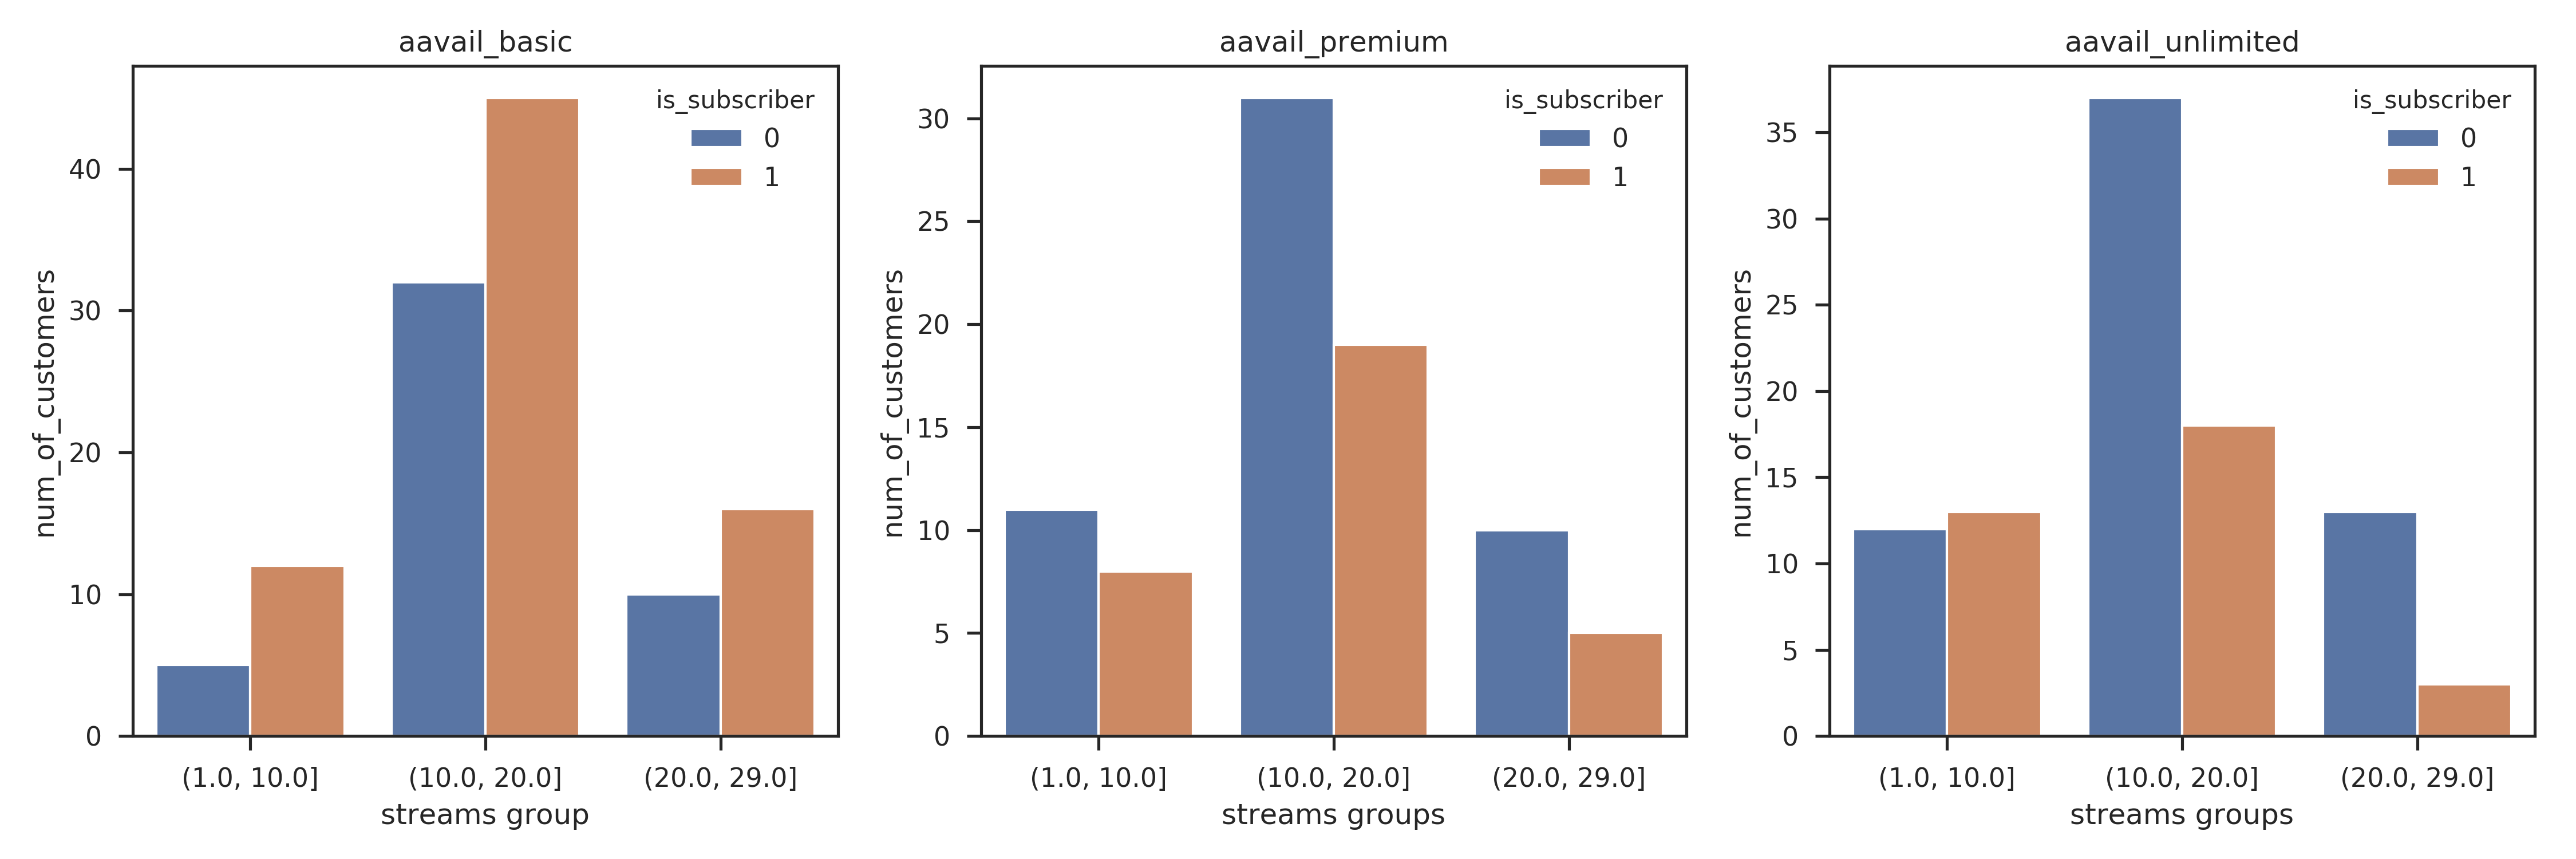

In [27]:
Image("../images/num_of_customers_per_streams_group.png",width=800, height=800)

### Findings from the analysis of our Features

**As we undertsand that the goal of our data analysis was to find factors that are influencing the Singapore situation**

Here are some of the findings of the data analysis:

- There are more subscribers in the US than in Singapore
- In Singapore the basic product has the highest number of subscribers
- The highest churn rate in Singapore is observed in the unlimited product
- The main target group is young customers between 15 and 29 years old
- The average number of streams for all products for subscribers and non-subscribers is 15 streams

### Next Steps

From the findings abover we understand some of the important factors influencing our goal to be the subscriber_type, age and location but 
our findings does not provide any specific or deep insights on the factors that influence our goal.

Some of the next steps that can be performed are:
* Deep Dive Data analysis on each feature - We can use PCA (Principal Component Analysis) to explore the variations in variables.
* Hypothesis testing  - We can hypothesize each feature and it's importance.
* We can also calculate multiple types of aggregations for any given feature for better data explorations.

In [28]:
# to convert the jupyter to slides presentation run in the command window the following
# jupyter nbconvert --to slides --TemplateExporter.exclude_input=True m2-u4-eda-case-study-georchat.ipynb